#**Initialization** 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sys
#np.set_printoptions(threshold=sys.maxsize)


#General Initialization

In [0]:
def initialize(N,A):
  global psi
  D = 2**N
  psi = np.zeros((D,1))
  psi[A] = 1
  #print(psi)


#**The Hadamard** **Gate for 7 Qubits**

In [0]:
#Using Kronecker product to generate multiqubit Hadamard gates

H = (1/(np.sqrt(2))) * np.array([[1,1],[1,-1]])
I = np.identity(2,int)

#H(1)
H_I = np.kron(H,I)
H_I_I = np.kron(H_I,I)
H_I_I_I = np.kron(H_I_I,I)
H_I_I_I_I = np.kron(H_I_I_I,I)
H_I_I_I_I_I = np.kron(H_I_I_I_I,I)
#H_I_I_I_I_I_I
H_1 = np.kron(H_I_I_I_I_I,I)

#H(2)
I_H = np.kron(I,H)
I_H_I = np.kron(I_H,I)
I_H_I_I = np.kron(I_H_I,I)
I_H_I_I_I = np.kron(I_H_I_I,I)
I_H_I_I_I_I = np.kron(I_H_I_I_I,I)
#I_H_I_I_I_I_I
H_2 = np.kron(I_H_I_I_I_I,I)

#H(3)
I_I = np.kron(I,I)
I_I_H = np.kron(I_I,H)
I_I_H_I = np.kron(I_I_H,I)
I_I_H_I_I = np.kron(I_I_H_I,I)
I_I_H_I_I_I = np.kron(I_I_H_I_I,I)
#I_I_H_I_I_I_I
H_3 = np.kron(I_I_H_I_I_I,I)

#H(4)
I_I_I = np.kron(I_I,I)
I_I_I_H = np.kron(I_I_I,H)
I_I_I_H_I = np.kron(I_I_I_H,I)
I_I_I_H_I_I = np.kron(I_I_I_H_I,I)
#I_I_I_H_I_I_I
H_4 = np.kron(I_I_I_H_I_I,I)

#H(5)
I_I_I = np.kron(I_I,I)
I_I_I_I = np.kron(I_I_I,I)
I_I_I_I_H = np.kron(I_I_I_I,H)
I_I_I_I_H_I = np.kron(I_I_I_I_H,I)
#I_I_I_I_H_I_I
H_5 = np.kron(I_I_I_I_H_I,I)

#H(6)
I_I_I = np.kron(I_I,I)
I_I_I_I = np.kron(I_I_I,I)
I_I_I_I_I = np.kron(I_I_I_I,I)
I_I_I_I_I_H = np.kron(I_I_I_I_I,H)
#I_I_I_I_I_H_I 
H_6 = np.kron(I_I_I_I_I_H,I)

#H(7)
I_I_I = np.kron(I_I,I)
I_I_I_I = np.kron(I_I_I,I)
I_I_I_I_I = np.kron(I_I_I_I,I)
I_I_I_I_I_I = np.kron(I_I_I_I_I,I)
#I_I_I_I_I_I_H 
H_7 = np.kron(I_I_I_I_I_I,H)






In [0]:
initialize(7,0)
print(psi)

#**The Quantum Oracle Matrix**

In [57]:
O = np.identity(128,int)

#setting 0000010
O[2][2] = -1





print(O)

[[ 1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 -1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


#**Special Operator J**

In [11]:
J = np.identity(128,int)
J[0][0] = -1





print(J)

[[-1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


#**Plot Histogram**

In [0]:
def plotHist():

  histData = psi_new
  #objects = ('000', '001', '010', '011', '100', '101','110','100')
  y_pos = np.arange(len(histData))
  #plt.figure(figsize=(15,8))
  #plt.xticks(y_pos, objects)
  #plt.ylabel('Probability')
  #plt.xlabel('Quantum State')
  #plt.title('Quantum State Measurement Probability')
  plt.bar(y_pos, histData, align='center', alpha=0.5)



#**Grover’s Quantum Search Algorithm**

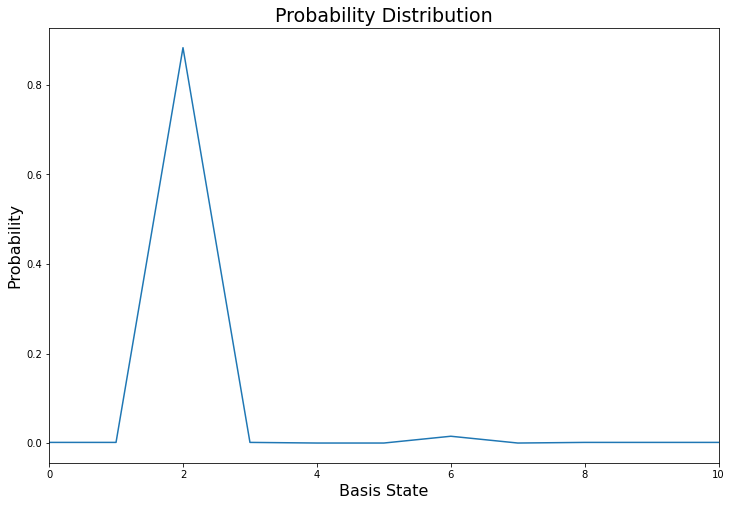

In [68]:
repetitions = 9
initialize(7,0)

#Placing each qubit into a superposition
psi_1 =  np.matmul(H_1,psi)
psi_2 =  np.matmul(H_2,psi_1)
psi_3 =  np.matmul(H_3,psi_2)
psi_4 =  np.matmul(H_4,psi_3)
psi_5 =  np.matmul(H_5,psi_4)
psi_6 =  np.matmul(H_6,psi_5)
psi_new =  np.matmul(H_7,psi_6)

#Grover Iteration Operator
for i in range(1,repetitions+1):
  global psi_new

  #applying Quantum Oracle 
  O_psi = np.matmul(O,psi_new)

  #Applying Hadamard Gates to each Qubit
  psi__1 =  np.matmul(H_1,O_psi)
  psi__2 =  np.matmul(H_2,psi__1)
  psi__3 =  np.matmul(H_3,psi__2)
  psi__4 =  np.matmul(H_4,psi__3)
  psi__5 =  np.matmul(H_5,psi__4)
  psi__6 =  np.matmul(H_6,psi__5)
  psi__7 =  np.matmul(H_7,psi__6)

  #Applying Special Operator J
  psi__8 =  np.matmul(J,psi__7)

  #Applying Hadamard Gates to each Qubit
  psi__9 =  np.matmul(H_1,psi__8)
  psi__10 =  np.matmul(H_2,psi__9)
  psi__11 =  np.matmul(H_3,psi__10)
  psi__12 =  np.matmul(H_4,psi__11)
  psi__13 =  np.matmul(H_5,psi__12)
  psi__14 =  np.matmul(H_5,psi__13)
  psi__15 =  np.matmul(H_6,psi__14)
  psi_new =  np.matmul(H_7,psi__15)

  #plt.plot(psi_new)



psi_new = psi_new*psi_new
plt.figure(figsize=(12,8))
plt.title('Probability Distribution',fontsize=19)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Basis State',fontsize=16)
plt.xlim(0, 10)
plt.plot(psi_new)
plt.savefig(f'Grover7QState3Zoom', bbox_inches='tight')

#plt.xlim(115, 128)

#print(psi_new)


#d = np.sun(psi_new)
#print(d)
